In [1]:
from help_funcs.evaluation import evaluate_model, epistemic, get_pca_plots
from sklearn.metrics import f1_score

# GCN Multi-class

train loss: 0.9816800355911255 f1:0.5782312925170068
val loss: 0.97920161485672 f1:0.4444444444444444
test loss: 1.2514183521270752 f1:0.42857142857142855


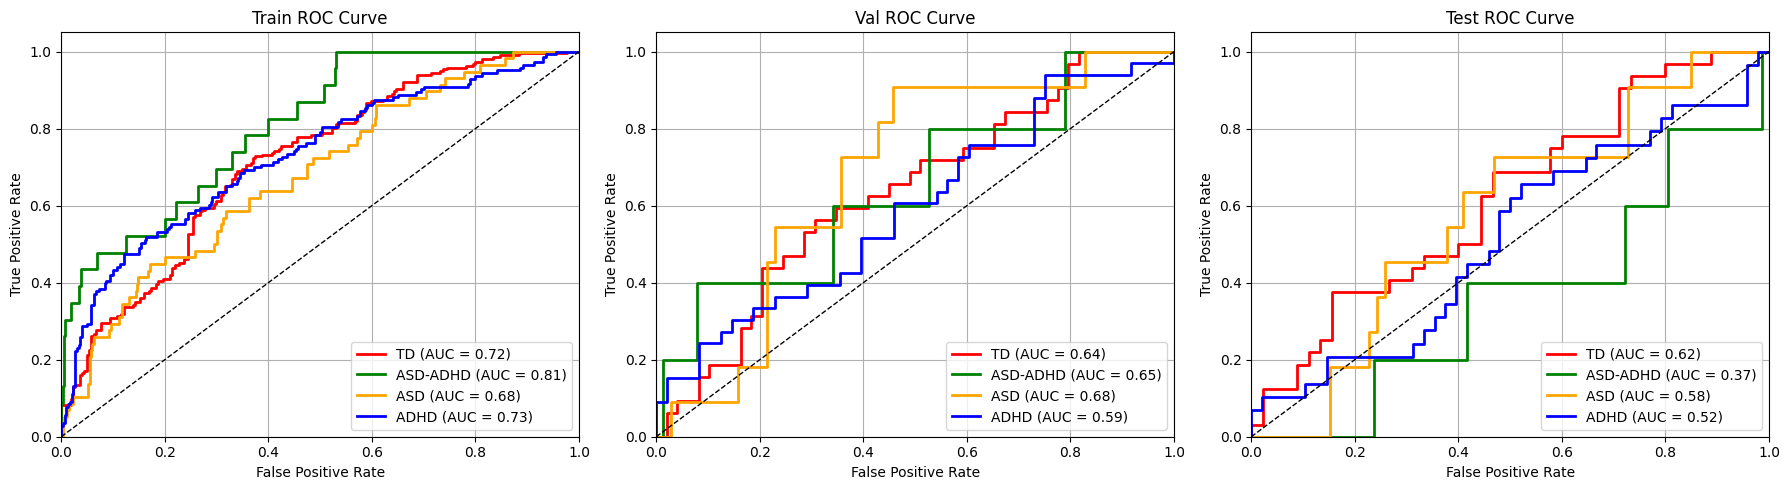

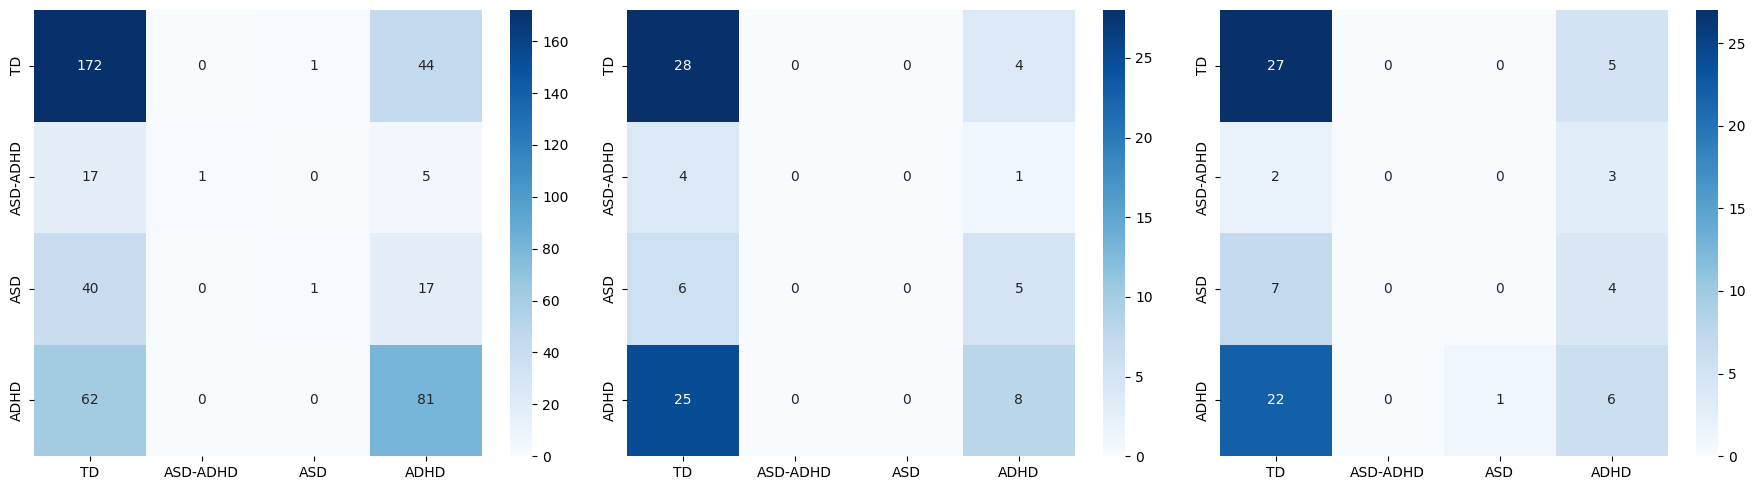

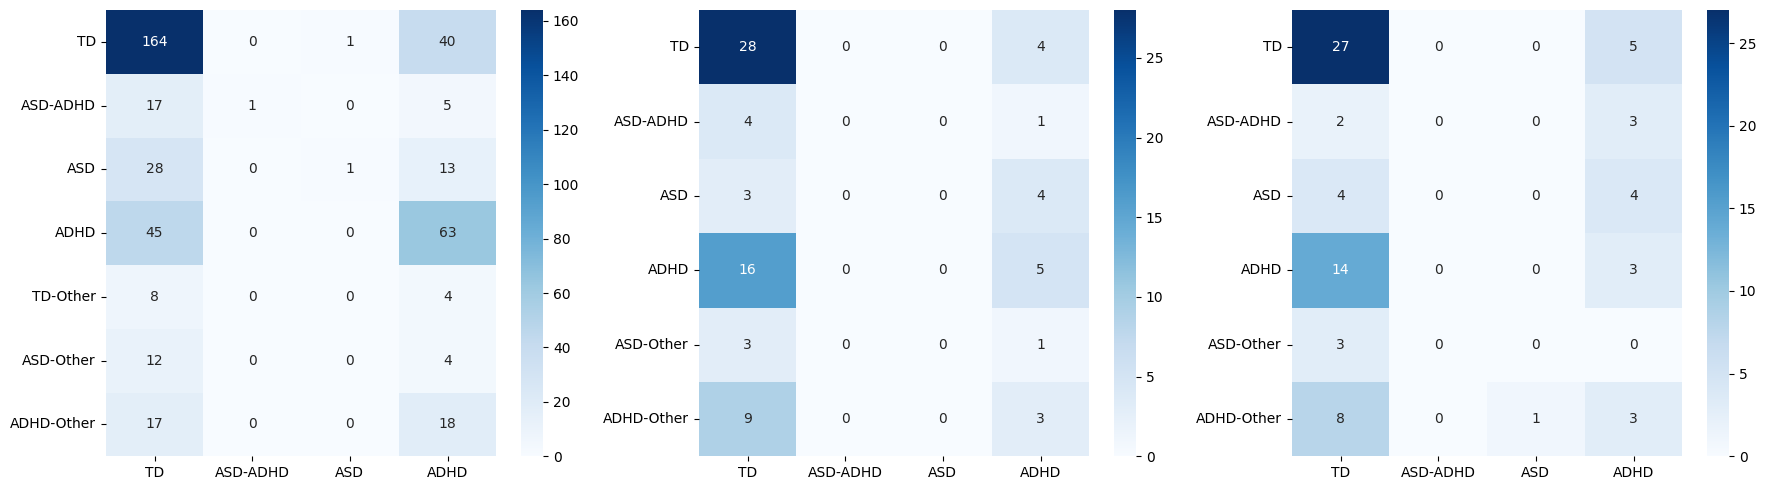

In [2]:
softmax_data = evaluate_model(yaml_file = "saved_models/GCN_Multi_absolute_weights.yaml", 
                            model_file = "saved_models/GCN_Multi_absolute_weights.pt", 
                            drop_strategy = None, 
                            gat = False)

# GCN Binary-class

train loss: 0.5547943711280823 f1:0.6938775510204082
val loss: 0.5222151875495911 f1:0.654320987654321
test loss: 0.5780280828475952 f1:0.6103896103896104


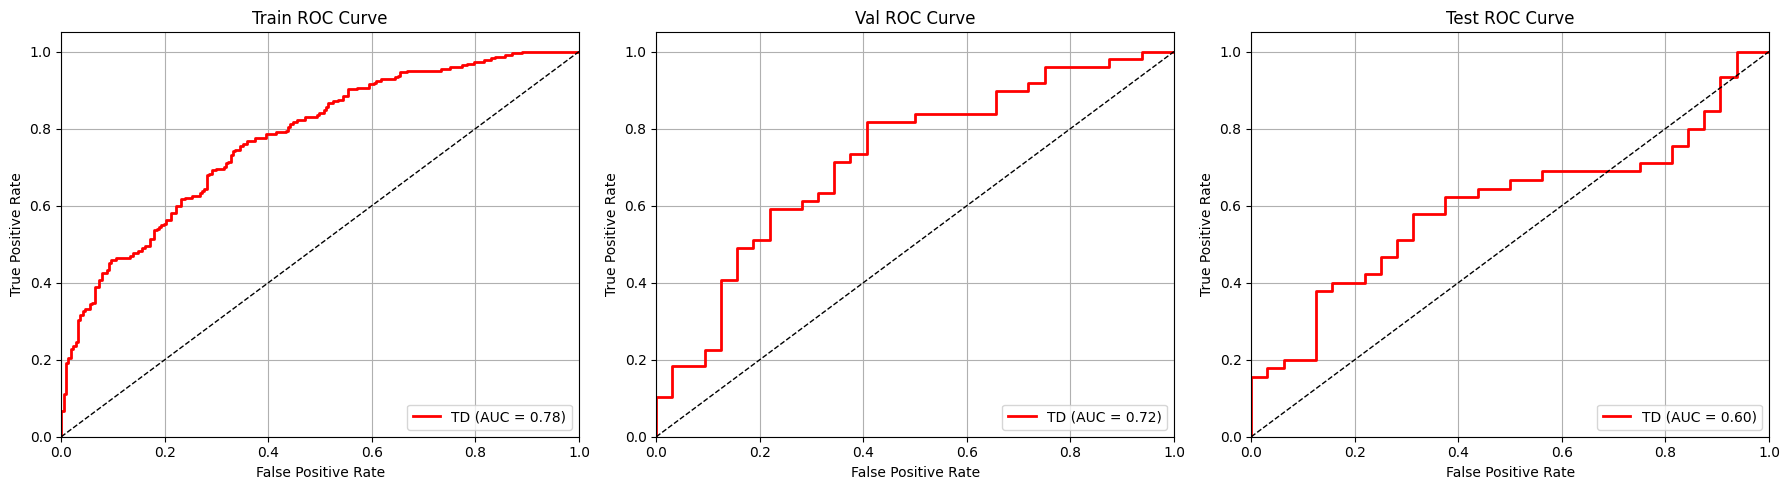

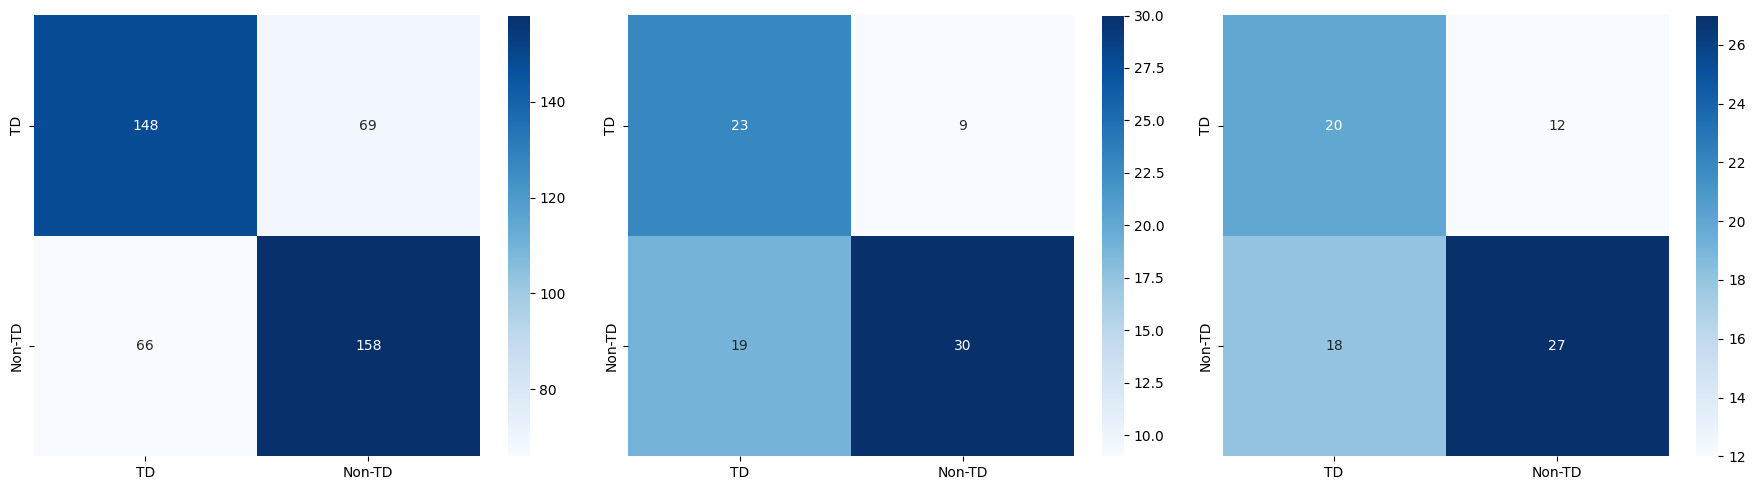

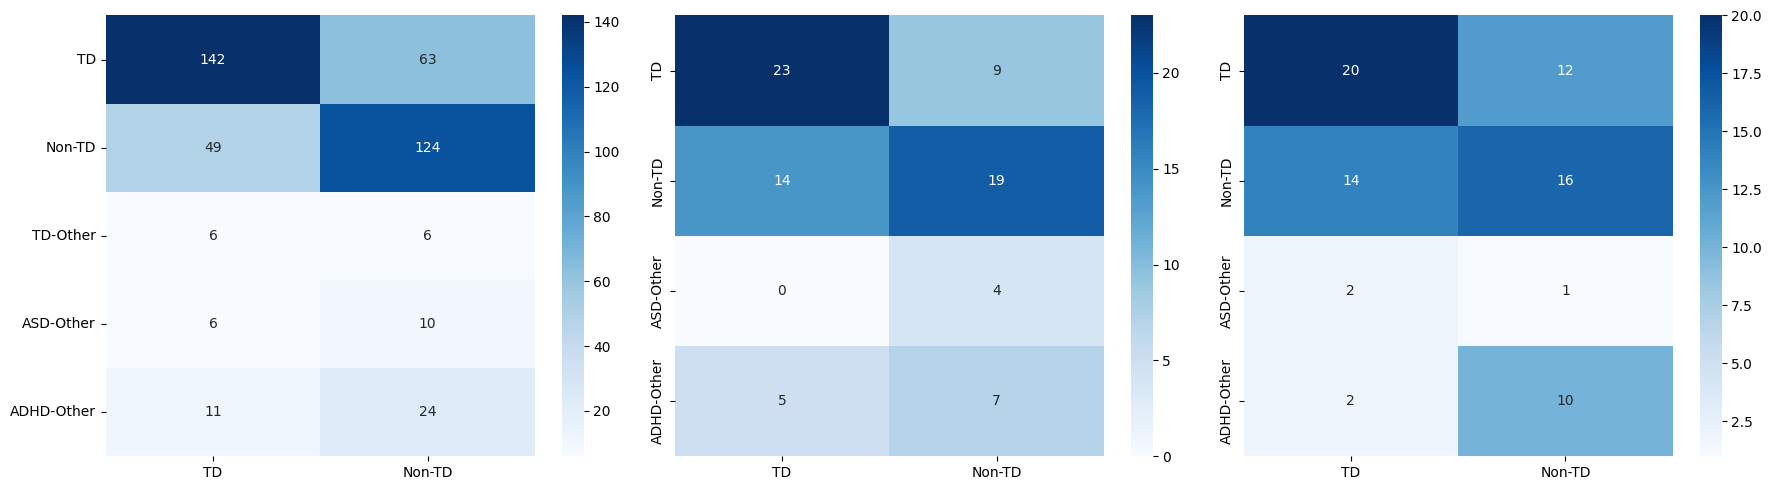

,label,predicted,softmax_values
0,TD,Non-TD,[0.5472467541694641]
1,TD,TD,[0.47332605719566345]
2,TD,Non-TD,[0.6302391290664673]
3,Non-TD,Non-TD,[0.5881670713424683]
4,Non-TD,Non-TD,[0.7684990167617798]
...,...,...,...
436,Non-TD,Non-TD,[0.500506579875946]
437,Non-TD,Non-TD,[0.7893200516700745]
438,TD,TD,[0.46997135877609253]
439,TD,TD,[0.29943713545799255]


In [3]:
evaluate_model(yaml_file = "saved_models/GCN_Binary_absolute_weights.yaml", 
               model_file = "saved_models/GCN_Binary_absolute_weights.pt", 
               drop_strategy = None, 
               gat = False)

# GAT Multi-class

train loss: 0.8160123825073242 f1:0.6621315192743764
val loss: 0.9097995162010193 f1:0.5679012345679012
test loss: 1.3263483047485352 f1:0.37662337662337664


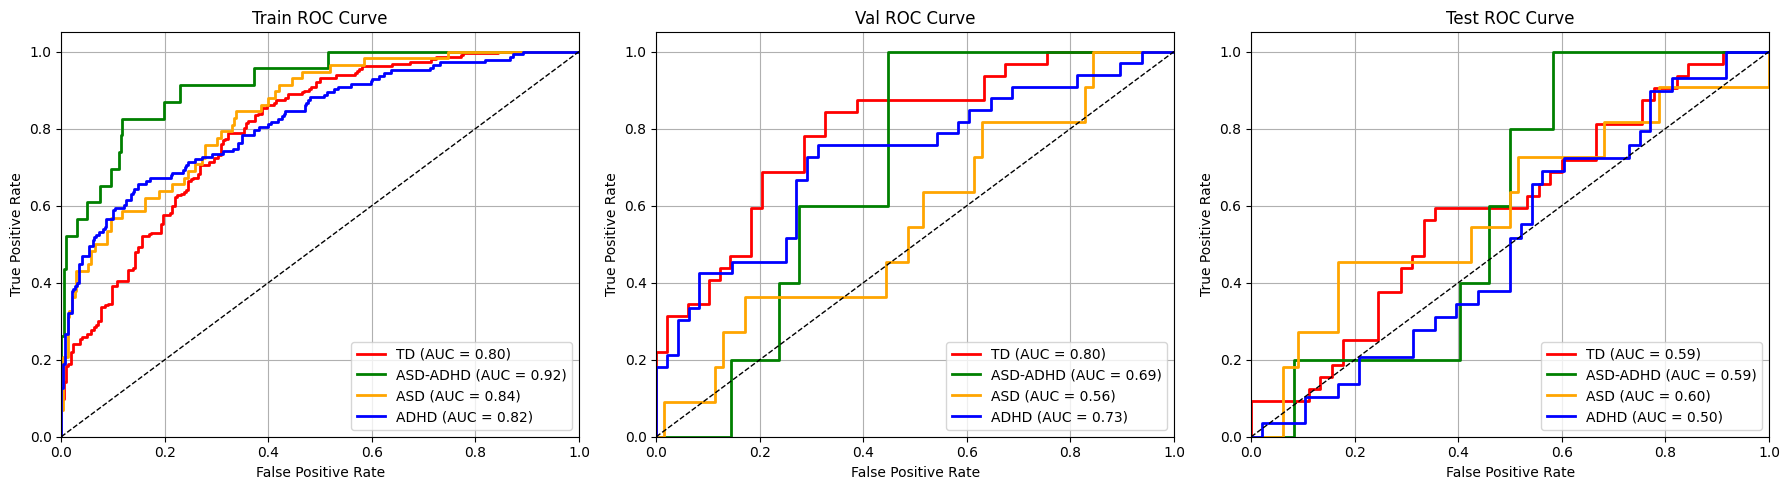

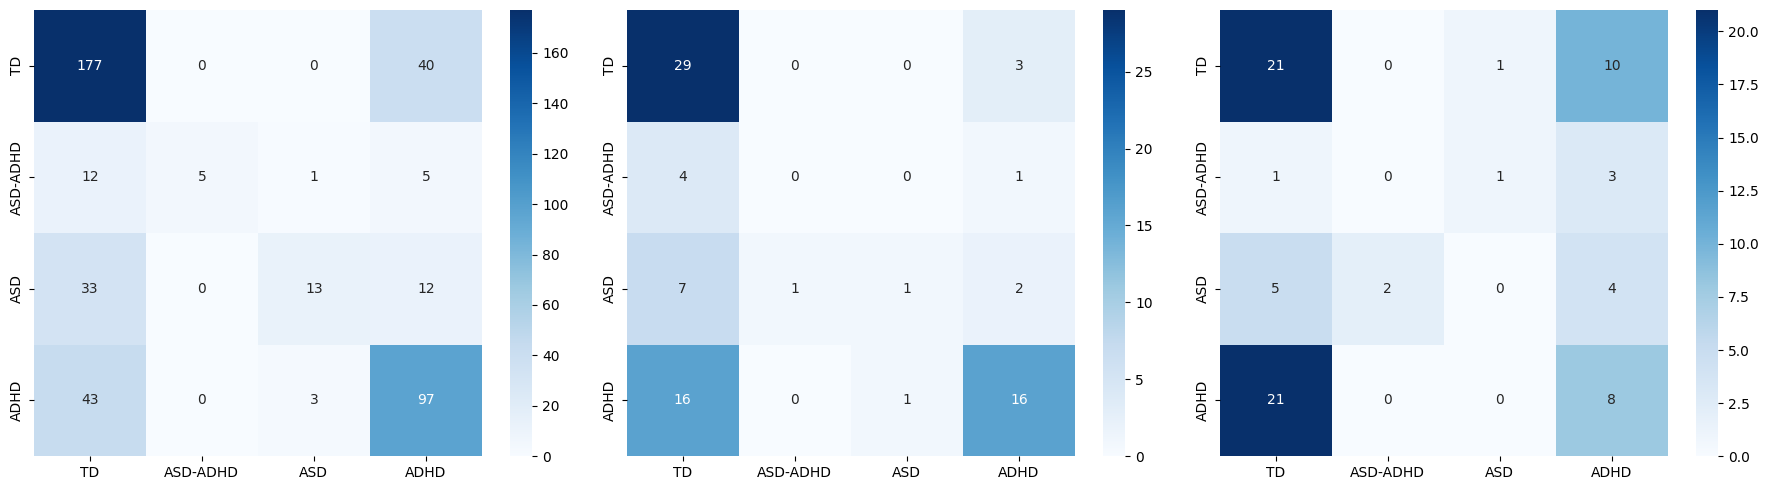

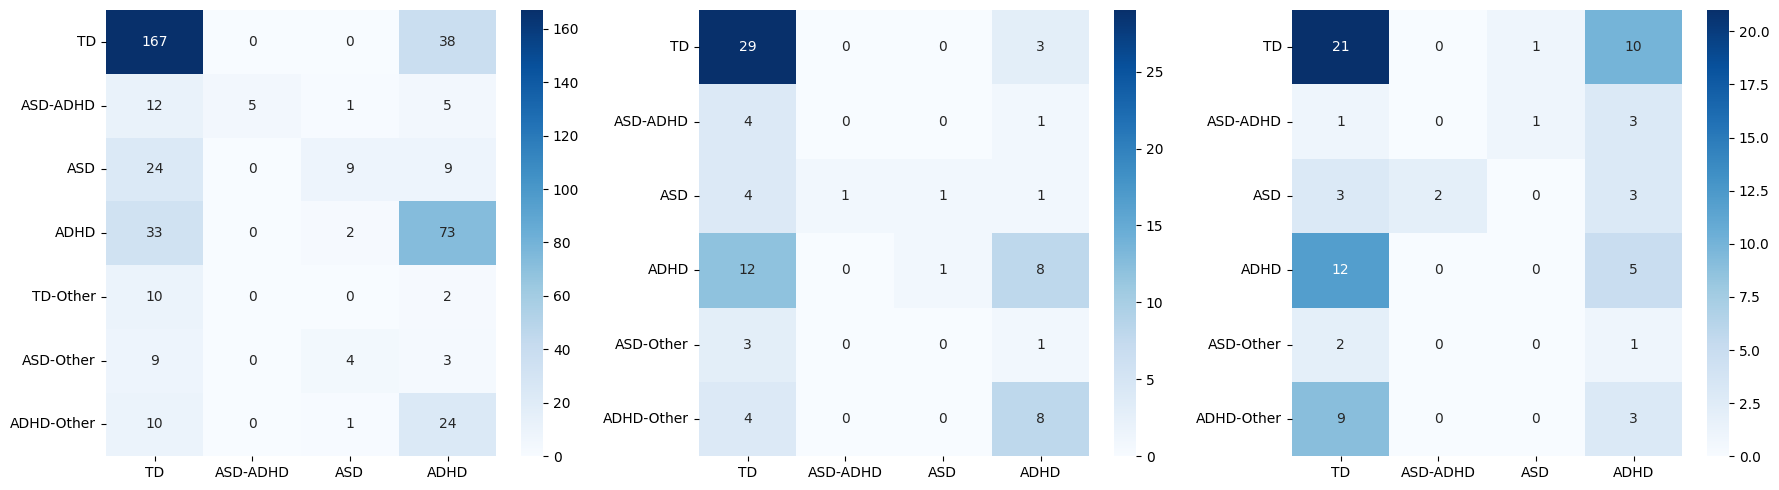

In [4]:
softmax_data = evaluate_model(yaml_file = "saved_models/GAT_Multi_S2_relative.yaml", 
                            model_file = "saved_models/GAT_Multi_S2_relative.pt", 
                            drop_strategy = 2, 
                            gat = True)

In [5]:
means = softmax_data[['label', 'predicted', 'TD', 'ASD-ADHD', 'ASD', 'ADHD']].groupby(['label', 'predicted']).mean().reset_index()
means['count'] = softmax_data[['label', 'predicted', 'TD']].groupby(['label', 'predicted']).count().reset_index()['TD']

In [6]:
d = epistemic(yaml_file = "saved_models/GAT_Multi_S2_relative.yaml", 
            model_file = "saved_models/GAT_Multi_S2_relative.pt", 
            dropout = 0.25, 
            forward_passes = 100,
            drop_strategy = 2, 
            gat = True,
            data_set = 'val')
f1_score(d['Label'], d['Predicted'], average='micro')

0.5185185185185185

********* BEFORE *********
Number of features: 272
Explained variance ratio: [0.2390044  0.10112438]
********* AFTER *********
Number of features: 8704
Explained variance ratio: [0.22639003 0.14022548]


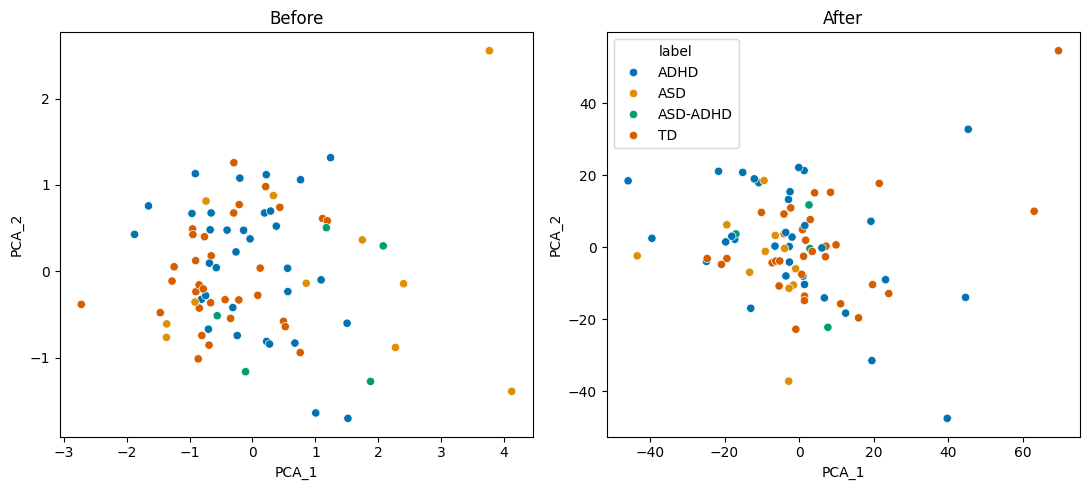

In [7]:
before, after = get_pca_plots(yaml_file = "saved_models/GAT_Multi_S2_relative.yaml", 
                                model_file = "saved_models/GAT_Multi_S2_relative.pt", 
                                drop_strategy = 2, 
                                gat = True, 
                                dataset = 'val')

# GAT Binary

train loss: 0.4492197036743164 f1:0.7437641723356009
val loss: 0.3664683401584625 f1:0.7407407407407407
test loss: 0.7494200468063354 f1:0.6103896103896104


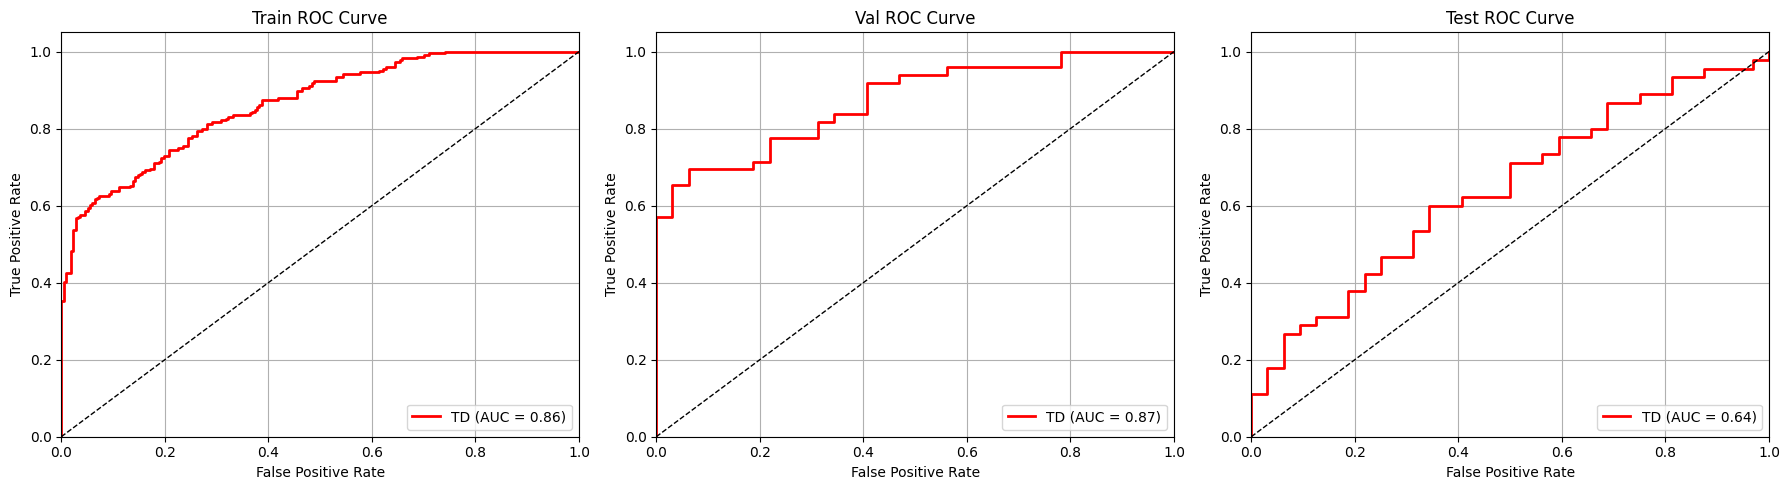

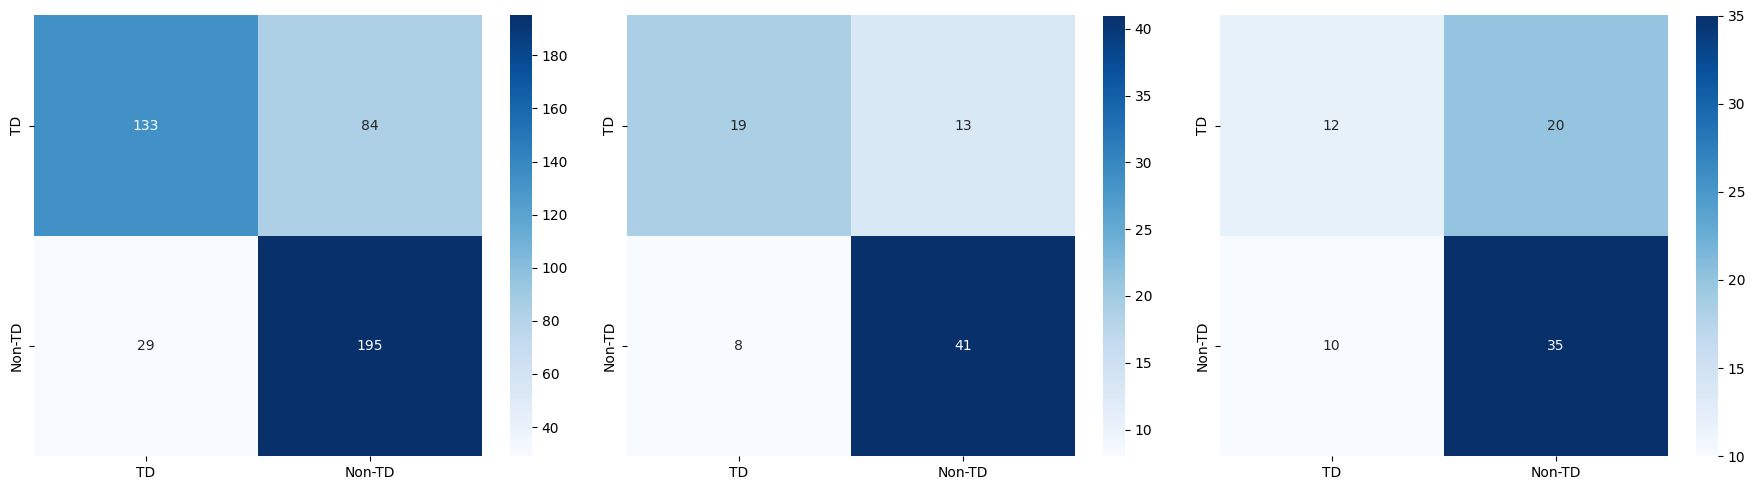

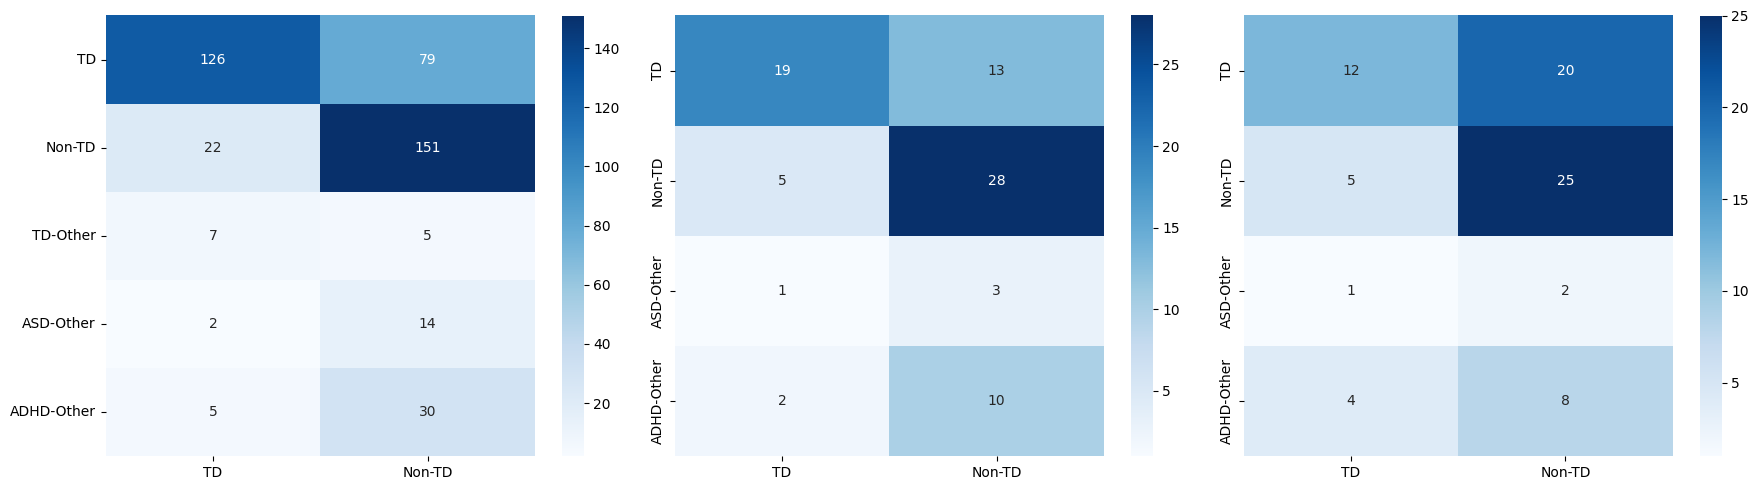

In [8]:
softmax_data = evaluate_model(yaml_file = "saved_models/GAT_Binary_S2_relative.yaml", 
                                model_file = "saved_models/GAT_Binary_S2_relative.pt", 
                                drop_strategy = 2,
                                gat = True)

In [ ]:
d = epistemic(yaml_file = "saved_models/GAT_Binary_S2_relative.yaml", 
            model_file = "saved_models/GAT_Binary_S2_relative.pt", 
            dropout = 0.25, 
            forward_passes = 100,
            drop_strategy = 2, 
            gat = True,
            data_set = 'val')
f1_score(d['Label'], d['Predicted'], average='micro')

************ TD ************


TypeError: epistemic() got an unexpected keyword argument 'diagnosis'

In [ ]:
before, after = get_pca_plots(yaml_file = "saved_models/GAT_Binary_S2_relative.yaml", 
                                model_file = "saved_models/GAT_Binary_S2_relative.pt", 
                                drop_strategy = 2,
                                gat = True,
                                dataset = 'val')